# About Random String Data Genration
    Through random_string_data_gen.ipynb script we will target to do following:
        1. Generate a simpe dataset of random string image with following contraints:
            1. All images are of same size
            2. All images are single channel image with white background and black text
            3. Maximum number of character in random string is 16 (including space)
            4. Font used are one available from openCV (will be changed later to use any font)
        2. Convert dataset to tfrecord format
        3. Test the tfrecord file by reading it back and visulaizing the images and labels from dataset
    Link to the blogpost: https://medium.com/@vijendra1125/ocr-part-1-generate-dataset-69509fbce9c1

### Load libraries

In [1]:
import os
import sys
import cv2
import string
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from datetime import datetime as dt

import  rsdg_functions as func

# set ro print numpy array without truncation
np.set_printoptions(threshold=sys.maxsize)

## Generate data

### Parameters

In [2]:
# path to folder where you could like to save the generted tfrecord data file
folder_path = "data"
# number of tfrecord files for rach of train and test
file_count = 2
# total number of training data per tfrecord file
# train_data_count = 8192
train_data_count = 5
# total number of test data per tfrecord file
# test_data_count = 2048
test_data_count = 1
# minimum number of characters in string (excluding whitespace)
min_char_count = 3
# maximum number of characters in string (excliuding whitespace)
max_char_count = 8
# random string length (including white space)
string_length = 16
# image size
image_size = (32, 256, 1)
# fonts 
font = [cv2.FONT_HERSHEY_SIMPLEX]
# font size
font_scale = np.arange(0.7, 1, 0.1) 
# font thickness
thickness = range(1, 3, 1)
# keywork to add in file name 
keyword = '3to8'

### Run

In [3]:
# print total data count 
print('total train data =', file_count * train_data_count)
print('total test data =', file_count * test_data_count)

for i in range(file_count):
  train_filename = "train_{key}_{idx}.tfrecords".format(key = keyword, idx = i+1)
  test_filename = "test_{key}_{idx}.tfrecords".format(key = keyword, idx = i+1)
  train_file_path = os.path.join(folder_path, train_filename)
  test_file_path = os.path.join(folder_path, test_filename)
  # train data
  print('generating train file number {idx}'.format(idx = i+1))
  images, labels = func.gen_rand_string_data(data_count = train_data_count,
                                        min_char_count = min_char_count,
                                        max_char_count = max_char_count, 
                                        string_length = string_length,
                                        image_size = image_size,
                                        font = font,
                                        font_scale = font_scale,
                                        thickness = thickness)
  func.write_tfrecords(images, labels, train_file_path)                     
  print('train file number {idx} generated'.format(idx = i+1))
  # test data
  print('generating test file number {idx}'.format(idx = i+1))
  images, labels = func.gen_rand_string_data(data_count = test_data_count,
                                        min_char_count = min_char_count,
                                        max_char_count = max_char_count, 
                                        string_length = string_length,
                                        image_size = image_size,
                                        font = font,
                                        font_scale = font_scale,
                                        thickness = thickness)
  func.write_tfrecords(images, labels, test_file_path)
  print('test file number {idx} generated'.format(idx = i+1))

total train data = 10
total test data = 2
generating train file number 1
time taken to generate data 0:00:00.039380

time taken to write data 0:00:00.018276
train file number 1 generated
generating test file number 1
time taken to generate data 0:00:00.009093
time taken to write data 0:00:00.010556
test file number 1 generated
generating train file number 2
time taken to generate data 0:00:00.020746
time taken to write data 0:00:00.012551
train file number 2 generated
generating test file number 2
time taken to generate data 0:00:00.002996
time taken to write data 0:00:00.006506
test file number 2 generated


## Visualize Generated Data

### Parameters

In [2]:
# path to folder where tfrecord files has been stored
folder_path = "data"
# tfrecord file paths
file_paths = []
filenames = os.listdir(folder_path)
for filename in filenames:
    if ".tfrecords" in filename: 
        file_paths.append(os.path.join(folder_path, filename))
# size on image in dataset
image_size = [32,256,1]
# random string length (including white space)
string_length = 16
# total number sof classes ( total number of characters considered here)
class_count = 63

# size of minibatch you want to read
batch_size = 32
# parameters related to reading tfrecord
num_of_threads = 16
min_after_dequeue = 5000
capacity=min_after_dequeue+(num_of_threads+1)*batch_size

# number of images to visualize
vis_image_count = 5
# if true show one hot encoded label
show_label = False

### Run

data type of image: <class 'numpy.float32'>
data type of label: <class 'numpy.int64'>
shape of image_batch: (32, 32, 256, 1)
shape of label_out: (32, 63, 16)


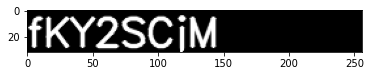

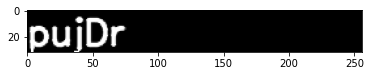

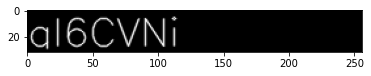

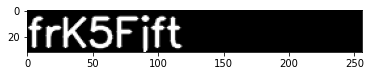

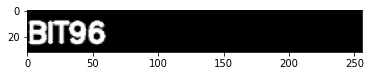

In [4]:
with tf.Graph().as_default():
  image_batch, label_batch = func.minibatch(file_paths, image_size, string_length, class_count,
                                    batch_size, capacity, min_after_dequeue, num_of_threads)
  init=tf.global_variables_initializer()
  with tf.Session() as sess:
    sess.run(init)
    sess.run(tf.local_variables_initializer())
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(coord=coord) 
    for i in range(5):
      image_b, label_b= sess.run([image_batch, label_batch])
      if(i==0):
        print('data type of image:', type(image_b[0][0,0,0]))
        print('data type of label:', type(label_b[0][0,0]))
        print("shape of image_batch:", image_b.shape)
        print('shape of label_out:', label_b.shape)
      plt.imshow(np.reshape(image_b[0],[32,256]), cmap = 'gray')
      plt.show()
      if show_label:
        print(sess.run(tf.transpose(label_b[0])))
    coord.request_stop()
    coord.join(threads)